In [ ]:
!pip install ultralytics
!pip install roboflow
!pip install supervision

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="aWKnqBpOXYvigaQZKkue")
project = rf.workspace("masinoppeprojekt").project("yolo_small_dataset")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/yolo_small_dataset-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

In [ ]:
  %cd {HOME}

  !yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/yolo_small_dataset-1/valid/labels.cache... 74 images, 0 backgrounds, 0 corrupt: 100% 74/74 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:03<00:00,  1.28it/s]
                   all         74       1001      0.804       0.74      0.791      0.417
               Kollane          7         21      0.997      0.905      0.989      0.656
                Punane         73        277      0.827      0.794      0.882      0.433
              Roheline         50        109      0.678      0.835      0.803      0.383
           Valgusfoor_         64        594      0.713      0.428      0.491      0.194
Speed: 2.4ms preprocess, 12.1ms inference, 0.0ms loss, 8.6ms postprocess per image
Results saved to runs/detect/val7
💡 Learn m

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/36 /content/yolo_small_dataset-1/test/images/041394_jpg.rf.bddfc230034b8c93a624f8660274f25f.jpg: 640x640 4 Punanes, 6 Valgusfoor_s, 16.3ms
image 2/36 /content/yolo_small_dataset-1/test/images/041397_jpg.rf.83826982dae90de8e48fd6fa1a94c88c.jpg: 640x640 7 Punanes, 8 Valgusfoor_s, 16.3ms
image 3/36 /content/yolo_small_dataset-1/test/images/041399_jpg.rf.5ba9156a9aa9f8a0f12452d49819028a.jpg: 640x640 7 Punanes, 8 Valgusfoor_s, 16.2ms
image 4/36 /content/yolo_small_dataset-1/test/images/041425_jpg.rf.b44fbe07d331c21af5a3d22806aa5083.jpg: 640x640 1 Kollane, 3 Punanes, 7 Valgusfoor_s, 16.2ms
image 5/36 /content/yolo_small_dataset-1/test/images/041431_jpg.rf.820d384ccf86696268de3baed6000eb2.jpg: 640x640 1 Kollane, 3 Punanes, 6 Valgusfoor_s, 16.2ms
image 6/36 /content/yolo_small_dataset-1/test/images/041445_jpg.rf.5

In [ ]:
!pip install ultralytics==8.0.196
import ultralytics
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.



0: 640x640 4 Punanes, 6 Valgusfoor_s, 16.8ms
Speed: 3.1ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 Punanes, 3 Rohelines, 7 Valgusfoor_s, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 Punanes, 2 Rohelines, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Punane, 4 Valgusfoor_s, 16.2ms
Speed: 1.7ms preprocess, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Punanes, 3 Rohelines, 1 Valgusfoor_, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Kollane, 3 Punanes, 6 Valgusfoor_s, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Punanes, 5 Rohelines, 8 Valgusfoor_s, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 1.5ms po

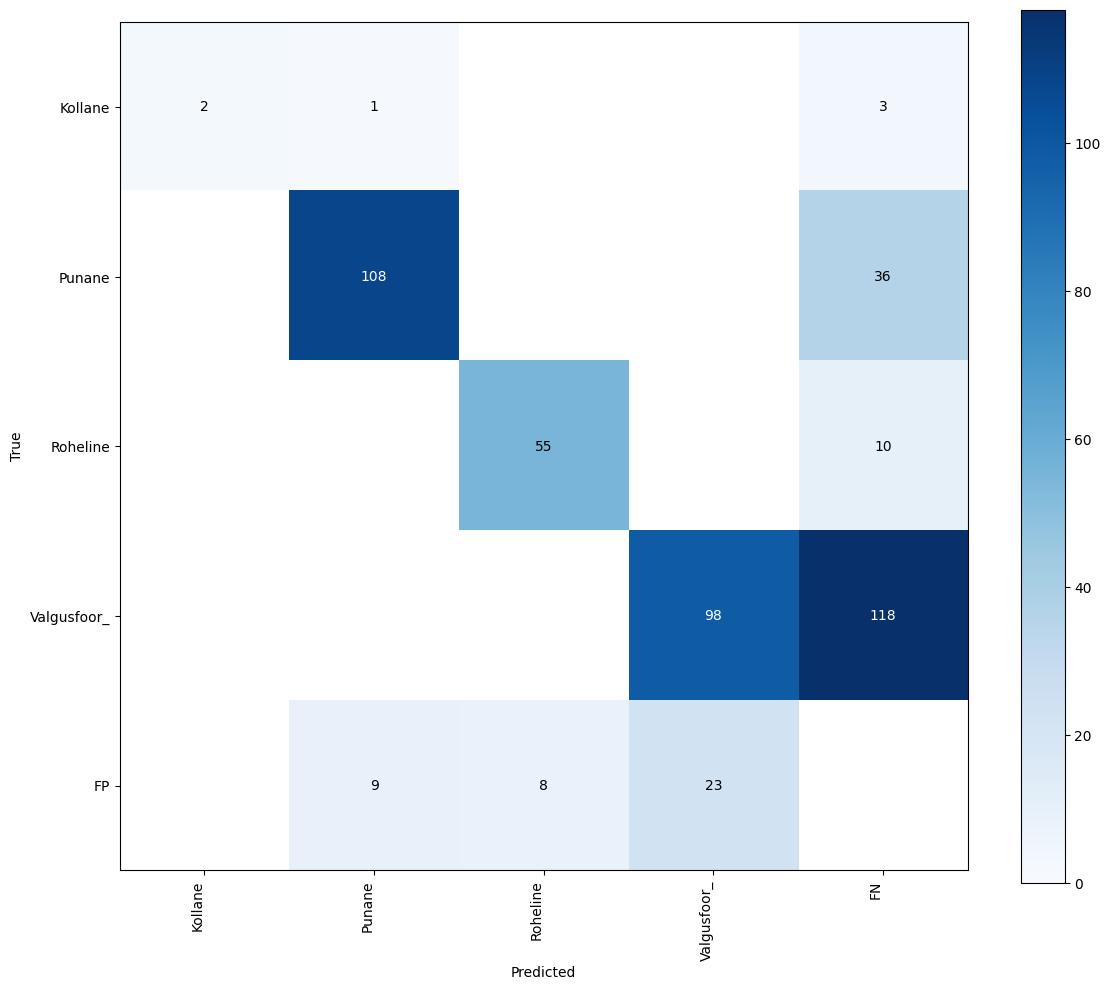

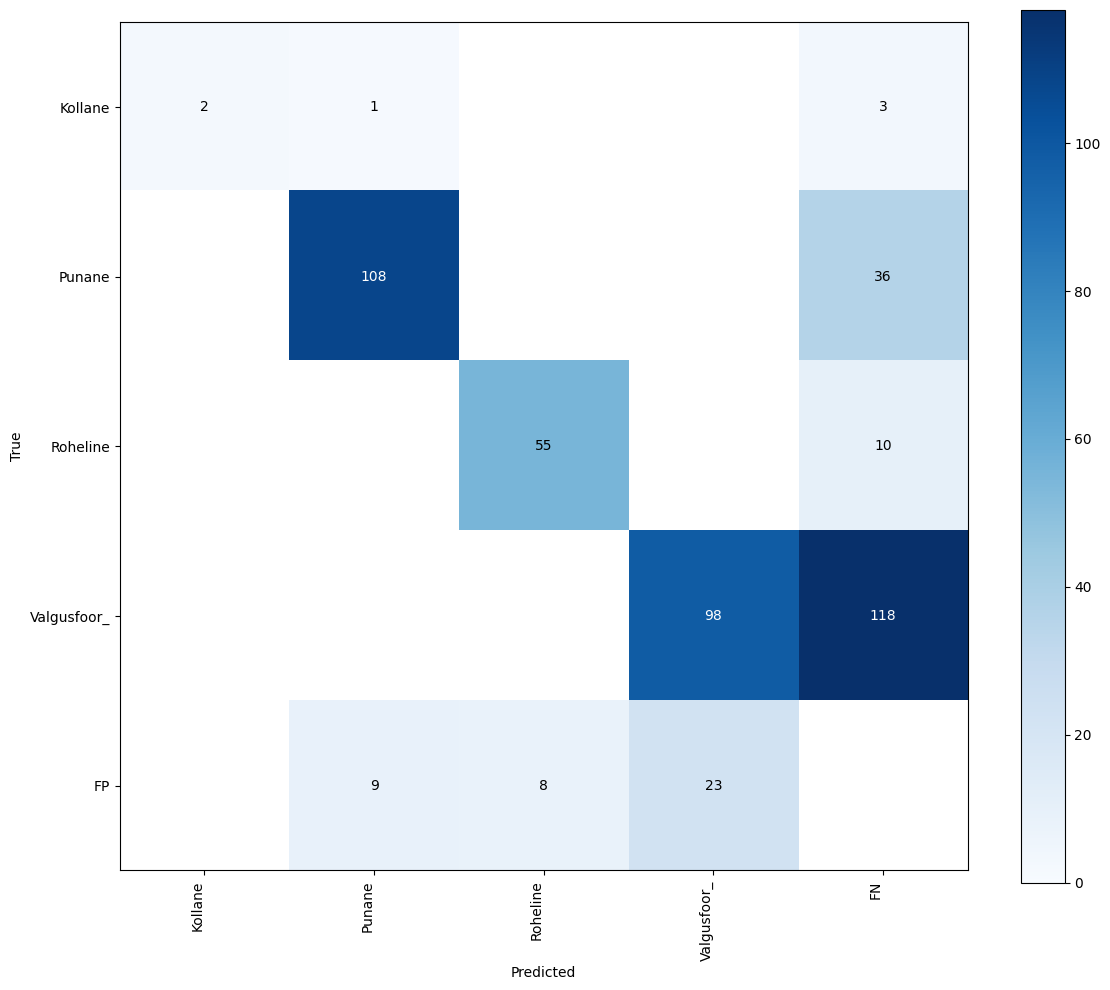

In [ ]:
from ultralytics import YOLO
import supervision as sv
import numpy as np

model = YOLO('runs/detect/train/weights/best.pt')

svdataset = sv.DetectionDataset.from_yolo(images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml")

def callback(image: np.ndarray) -> sv.Detections:
    result = model(image)[0]
    return sv.Detections.from_ultralytics(result)

confusion_matrix = sv.ConfusionMatrix.benchmark(
   dataset = svdataset,
   callback = callback
)

confusion_matrix.plot()